In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('/content/List of Countries by Sugarcane Production.csv')
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [ ]:
df.shape

(103, 7)

In [ ]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace(".","")
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace(".","")
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace(".","")
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace(".","")

In [ ]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,"3668,531",10226205,"75167,5"
1,1,India,Asia,348448000,260721,4950000,"70393,5"
2,2,China,Asia,123059739,88287,1675215,"73459,1"
3,3,Thailand,Asia,87468496,"1264,303",1336575,"65442,2"
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.rename(columns = {"Production (Tons)": "Production(Tons)" }, inplace = True)
df.rename(columns = {"Production per Person (Kg)": "Production_per_Person_(Kg)" }, inplace = True)
df.rename(columns = {"Acreage (Hectare)": "Acreage(Hectare)" }, inplace = True)
df.rename(columns = {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)" }, inplace = True)

In [ ]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,"3668,531",10226205,"75167,5"
1,1,India,Asia,348448000,260721,4950000,"70393,5"
2,2,China,Asia,123059739,88287,1675215,"73459,1"
3,3,Thailand,Asia,87468496,"1264,303",1336575,"65442,2"
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
 df.isna().sum()

,0
Unnamed: 0,0
Country,0
Continent,0
Production(Tons),0
Production_per_Person_(Kg),0
Acreage(Hectare),1
Yield(Kg/Hectare),1


In [ ]:
df[df["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [ ]:
df = df.dropna().reset_index()

In [ ]:
df.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,"3668,531",10226205,"75167,5"
1,1,1,India,Asia,348448000,260721,4950000,"70393,5"
2,2,2,China,Asia,123059739,88287,1675215,"73459,1"
3,3,3,Thailand,Asia,87468496,"1264,303",1336575,"65442,2"
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.drop(["index","Unnamed: 0"], axis = 1, inplace = True)

In [ ]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,"3668,531",10226205,"75167,5"
1,India,Asia,348448000,260721,4950000,"70393,5"
2,China,Asia,123059739,88287,1675215,"73459,1"
3,Thailand,Asia,87468496,"1264,303",1336575,"65442,2"
4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),object
Production_per_Person_(Kg),object
Acreage(Hectare),object
Yield(Kg/Hectare),object


In [ ]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_Person_(Kg)"] = df["Production_per_Person_(Kg)"].str.replace(',', '').astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].str.replace(',', '').astype(float)


In [ ]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),float64
Production_per_Person_(Kg),float64
Acreage(Hectare),float64
Yield(Kg/Hectare),float64


In [ ]:
df.nunique()

,0
Country,102
Continent,6
Production(Tons),102
Production_per_Person_(Kg),101
Acreage(Hectare),101
Yield(Kg/Hectare),102


In [ ]:
df["Continent"].value_counts()

,count
Continent,
Africa,38
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


<Axes: xlabel='Continent'>

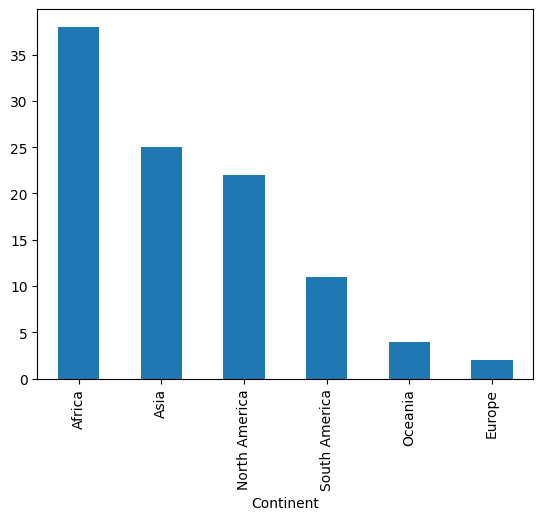

In [ ]:
df["Continent"].value_counts().plot(kind = 'bar')

<ipython-input-27-810b0ec75b0c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
<ipython-input-27-810b0ec75b0c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_Person_(Kg)"])
<ipython-input-27-810b0ec75b0c>:7: UserWarning: 

`distplot` is a deprecated

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

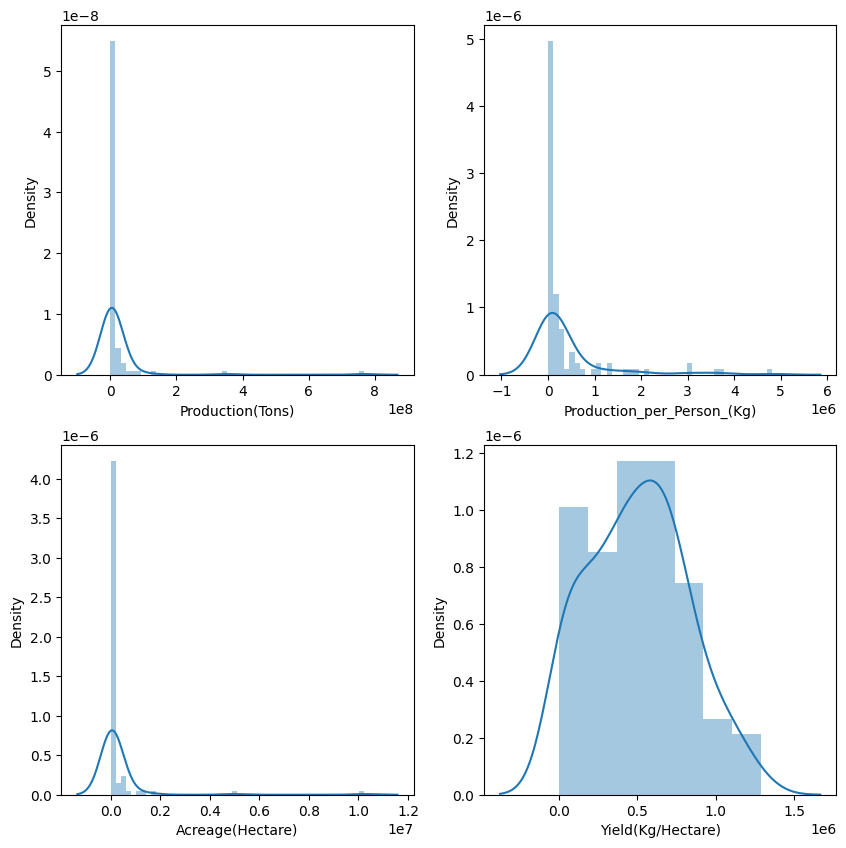

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production_per_Person_(Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])

<Axes: ylabel='Yield(Kg/Hectare)'>

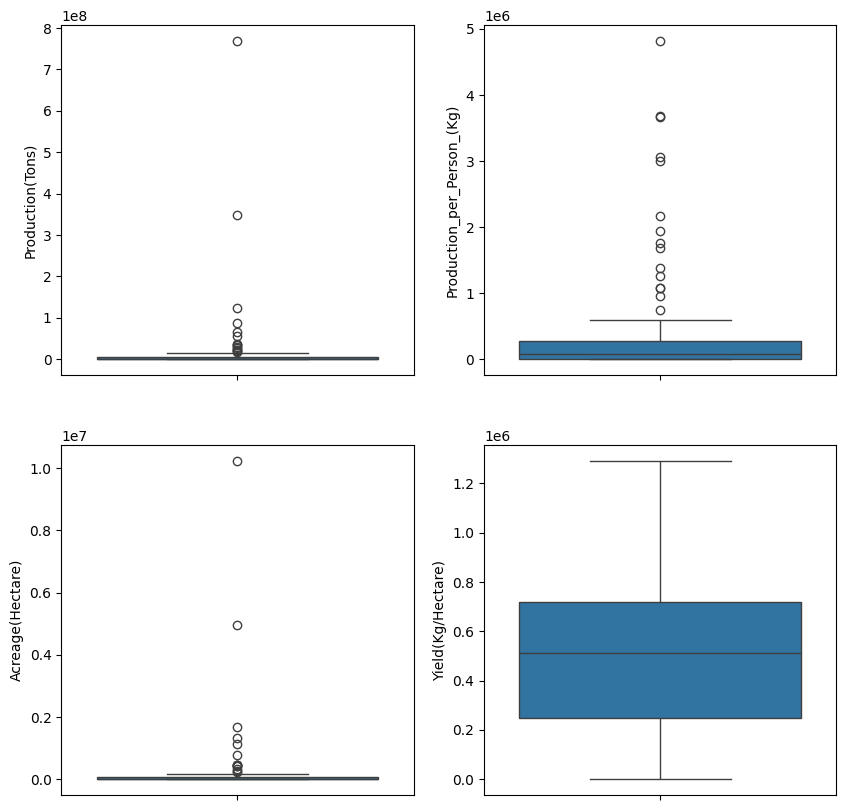

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person_(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])

In [ ]:
df.describe()

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,1.850372e+07,4.124805e+05,2.498981e+05,5.018502e+05
std,8.419149e+07,8.669140e+05,1.137003e+06,3.169530e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,6.251875e+04,1.075225e+04,1.104000e+03,2.487505e+05
50%,1.440044e+06,8.135850e+04,1.655800e+04,5.102500e+05
75%,6.426824e+06,2.828128e+05,8.047400e+04,7.198920e+05
max,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


In [ ]:
df_new = df[["Country", "Production(Tons)"]].set_index("Country")

In [ ]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [ ]:
df_new["Production(Tons)_percent"]